<a href="https://colab.research.google.com/github/CHRISTINEMUTHEE/Real_estate_analysis/blob/main/Moringa_Data_Science_Core__Module_2_Independent_Project_2021_10_Christine_Muthee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning: Hass Consulting Company Real Estate Analysis.

## 1.Defining the question.

#### The objective is to determine and analyse the factors affecting house prices. We will further predict the prices of houses considering factors provided in the data.

### a.) Specifying the question.

#### 1. What are the factors affecting house pricing? 
#### 2. What greately influences the house pricing ?
#### 3. What is the approximate cost of houses given several properties eg: bedrooms,bathrooms,area,Number of floors,renovation, presence of a water front etc



### b.) Defining the metric of success

#### * What will determine my successs is establishing the factors affecting house prices and how house prices are being affected. 

#### * This will be helpful in advising the company what factor needs more resources put to it and what are some of the improvements that can be done in ensuring that the company is at the top of the game when it comes to real estate.

#### * Determining the approximate price of the housing is paramount in ensuring we attract tenants with highly competitive yet fair prices while ensuring a good return on investment.

### c.) Recording the experimental design

#### * The experimental design involves viewing the data and ensuring its fitness for study while performing validation on it to ensure correctness and repeatability of the analysis.

#### * Performing a comprehensive study of the structure of the dataset while providing observation from every outcome of my analysis.

#### * Checking for anomalies,missing values and ilegitimate values inside the and dealing with them to ensure completeness and uniformity in the data.

#### * Creating a supervised model whole sole aim is to provide accurate and precise predictions of housing prices.

#### * Evaluating and cross checking the model against various optimization techniques to mark it as a suitable yet accurate predictor and solver of our problem.


#### d.) Data Relevance

#### As stated above the data contains properties within the real estate context that will be relevant in our analysis ie.bedrooms,bathrooms,area,Number of floors,renovation, presence of a water front etc.

## 2. Reading the data.

#### Importing all the necessary libraries

In [171]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Regression Libraries libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
# Other ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
# Function to diable warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# url=http://bit.ly/IndependentProjectWeek7Dataset
def DataFrame(data):
  df=pd.read_csv(data)
  return df

In [4]:
# Calling the function with the dataset
DataFrame('http://bit.ly/IndependentProjectWeek7Dataset')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## 3. Checking the data.

In [5]:
# Checking the head of the data
house_df=DataFrame('http://bit.ly/IndependentProjectWeek7Dataset')
house_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# Checking the estreemities of the dataset
house_df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [7]:
# Cheking the shape of my dataset
print('My housing dataset has ',house_df.shape[0],' rows and ',house_df.shape[1],' Columns.')

My housing dataset has  21613  rows and  20  Columns.


In [8]:
# Checking for the data types
print('It also has the following datatypes:',house_df.dtypes)
# There are no objects in this set.

It also has the following datatypes: id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


## 4.External Data Source Validation

#### Validation: Upon searching a sample of zip codes, they seem to come from different locations in the united stated eg,zipcode : 98103 is a postal code in Seatle Washington.Most of the zip codes come from Washington state.

## 5.Cleaning the dataset

#### Getting rid of unnecessary columns

In [9]:
house_df.head()
# Dropping unnecessary columns 
house_df1=house_df.drop(columns=['id','zipcode','sqft_living15','sqft_lot15','lat','long'])
house_df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0


#### Modifying the years so they dont get treated as outliers.

In [10]:
# Getting all the unique values with the maximum age 
print(house_df1['yr_renovated'].unique())
print(house_df1['yr_renovated'].max())

[   0 1991 2002 2010 1999 1992 2013 1994 1978 2005 2008 2003 1984 1954
 2014 2011 1974 1983 1945 1990 1988 1957 1977 1981 1995 2000 1998 1970
 1989 2004 1986 2009 2007 1987 1973 2006 1985 2001 1980 1971 1979 1997
 1950 1969 1948 2015 1968 2012 1963 1951 1993 1962 1996 1972 1953 1955
 1982 1956 1940 1976 1946 1975 1958 1964 1959 1960 1967 1965 1934 1944]
2015


In [11]:
# Unique year when the houses were built and the latest year to asses the ages
print(house_df1['yr_built'].unique())
print(house_df1['yr_built'].max())

[1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 1942 1927 1977 1900
 1979 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929
 1981 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991
 1954 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988
 1962 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924
 1990 1914 1926 2004 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943
 1957 1940 1918 1928 1974 1911 1936 1937 1982 1908 1931 1998 1913 2013
 1907 1958 2012 1912 2011 1917 1932 1944 1902 2009 1903 1970 2015 1934
 1938 1919 1906 1935]
2015


In [12]:
# I want to see the age of the houses from the year of building till the  most current year of data collection which is 2015
house_df1['age_built']=house_df1['yr_built'].apply(lambda x:2015-x)
# Getting the age from renovation. It could be an important factor in my analysis
house_df1['age_renovated']=house_df1['yr_renovated'].apply(lambda x:0 if x==0 else 2015-x)


In [13]:
house_df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,age_built,age_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,60,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,64,24
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,50,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,28,0


#### Dropping the years columns so that i can work with ages as a quantitative entity in my dataset

In [14]:
house_df2=house_df1.drop(columns=['yr_built','yr_renovated'],axis=1)
house_df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_built,age_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,60,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,64,24
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,50,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,28,0


#### Checking for missing values

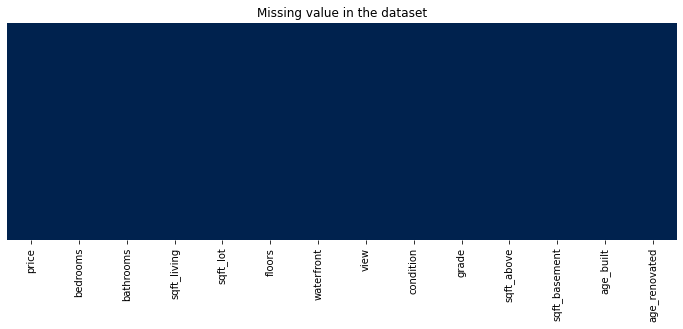

In [15]:
# Checking for missing values
plt.figure(figsize=(12,4))
sns.heatmap(house_df2.isnull(),cbar=False,cmap='cividis',yticklabels=False)
plt.title('Missing value in the dataset');
# There are no missing values in the dataset

### Detecting for outliers in discrete datatypes

<function matplotlib.pyplot.show>

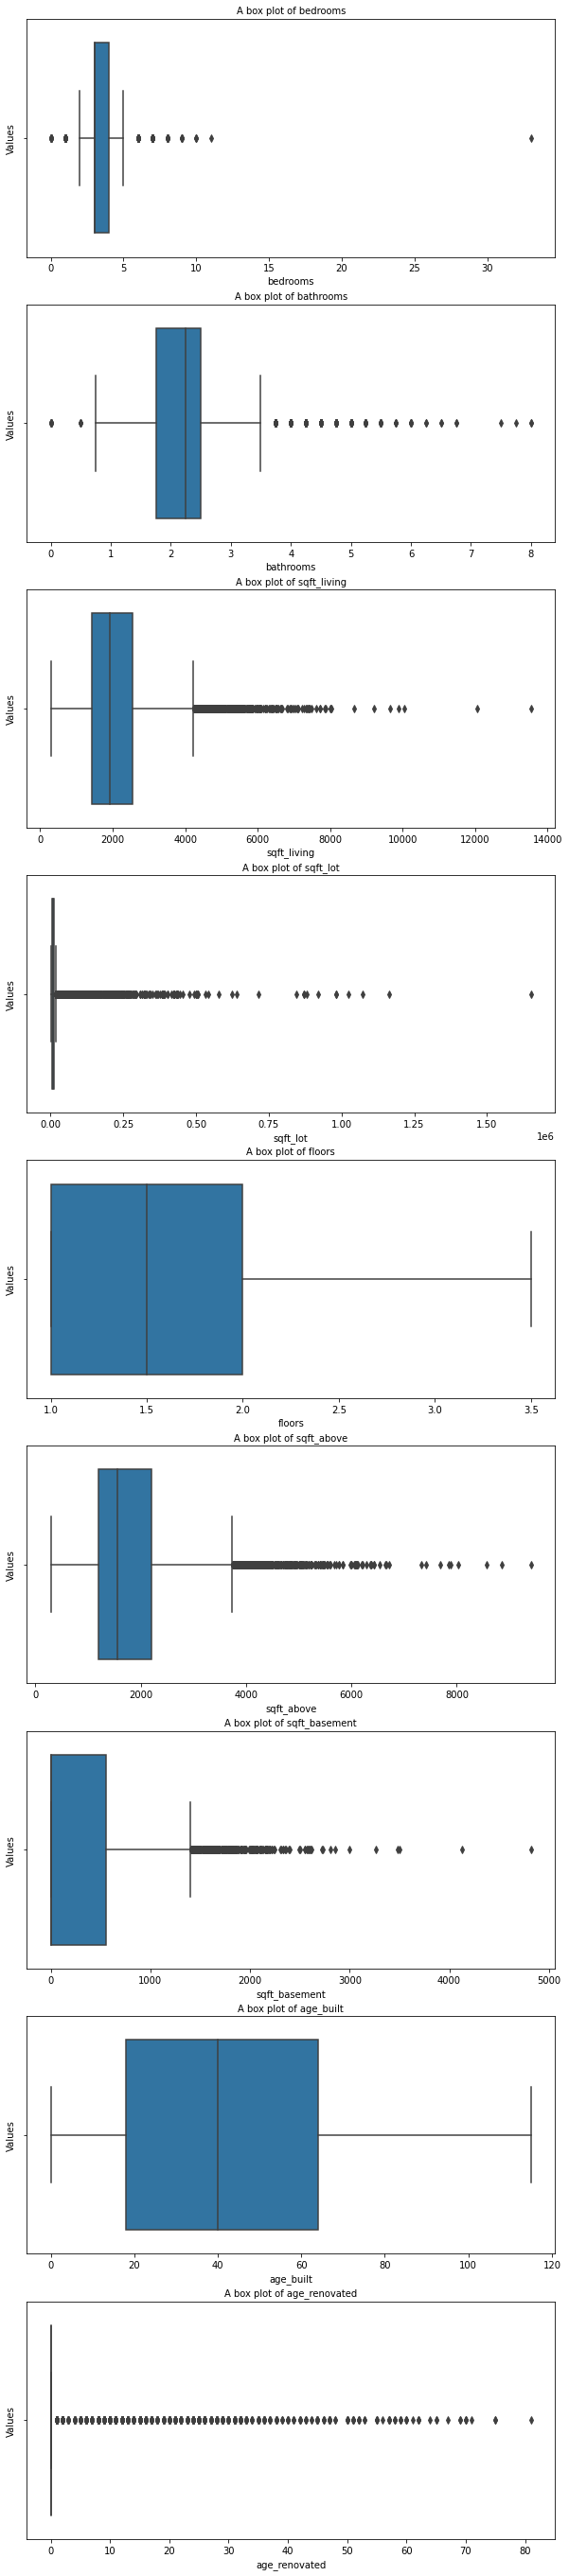

In [16]:
# Checking for outliers
cols=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','age_built','age_renovated']
fig,ax=plt.subplots(len(cols),figsize=(10,49))
for i,col_vals in enumerate(cols):
  sns.boxplot(x=house_df2[col_vals],ax=ax[i])
  ax[i].set_title('A box plot of '+format(col_vals),fontsize=10)
  ax[i].set_ylabel('Values')
plt.show
# The box plots were denoted for the discrete datatypes to help assess the legitimacy of the datapoints present.
# Outliers were detected in the bedrooms column with a house having more than 30 bedrooms
# A few houses were seen to have close to 8 bathrooms.
# The Square feet area of living area detected values greater than 14,000 square feet
# The present as outliers, however ,upon observation, the area of a space could be any space thus will treat it as a legitimate value
# The Square feet area of the parking lot detected a large disparity with some hpuses having hundreds while others greater than 1.6 Million square meters
# Floors did not have outliers within the set
# There were some outliers detected in the area in square feet above since most values lied at the range of 1000 to 2000
# Outliers were also detected in the square feet Area of basement .
# There are no outliers in the age of buildings
# The age from renovation seems to have values widely spread though out the dataset with lots of buildings not renovated.

In [17]:
print(house_df2['sqft_lot'].max())
print(house_df2['sqft_lot'].min())

1651359
520


#### Outliers in continous and categorical variables

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


7700000.0
75000.0


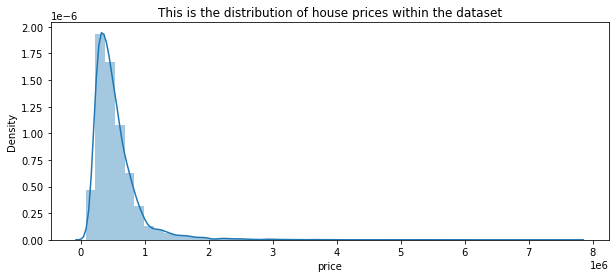

In [18]:
# Plotting a the distribution of house prices to check for outliers using the distribution
# ordinal=['waterfront','view']
plt.figure(figsize=(10,4))
sns.distplot(house_df2['price']) 
plt.title('This is the distribution of house prices within the dataset')
print(house_df2['price'].max())
print(house_df2['price'].min())
# These prices vary from 75,000 which is our minimum but there are houses who's price is greater than five million.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


81
0


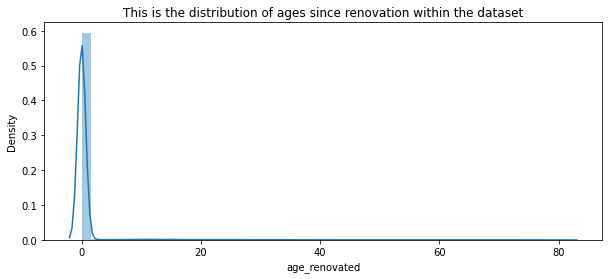

In [19]:
# Checking for outliers for age since renovation
plt.figure(figsize=(10,4))
sns.distplot(house_df2['age_renovated']) 
plt.title('This is the distribution of ages since renovation within the dataset')
print(house_df2['age_renovated'].max())
print(house_df2['age_renovated'].min())
# Houses seems not to be renovated because most values are distributed around zero..ie no renovation done

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


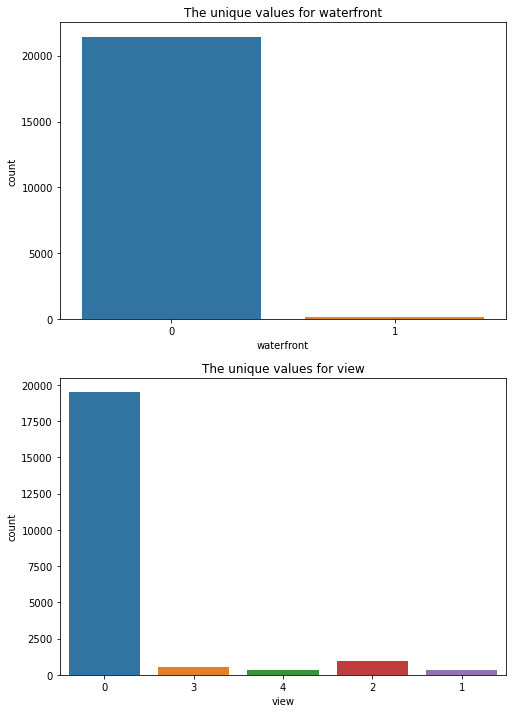

In [20]:
# Plotting a countplot for waterfront as individual categories
ordinal=['waterfront','view']
fig,ax=plt.subplots(len(ordinal),figsize=(8,12))
for i,cols in enumerate(ordinal):
  sns.countplot(house_df2[cols],order=house_df2[cols].unique(),ax=ax[i]) 
  ax[i].set_title('The unique values for '+format(cols))
# The water front view as are seen to be in categories of whether a water front exists or not and the number of views. 

Ordinal

<function matplotlib.pyplot.show>

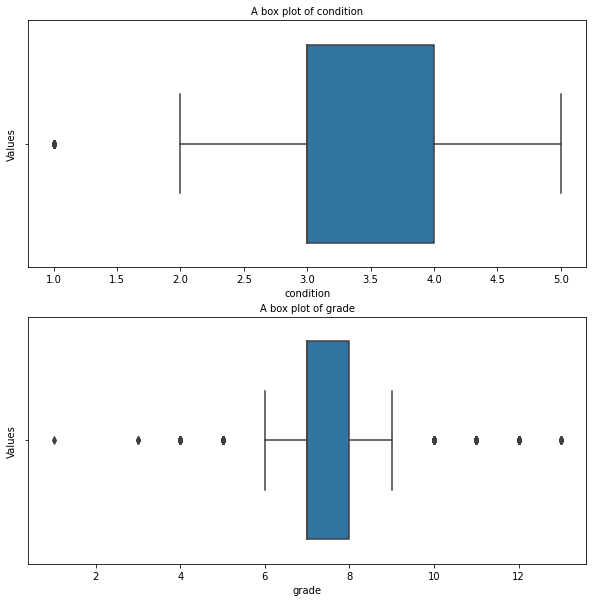

In [21]:
# Using z score to detect outliers in the waterfront,view and conditional data
# Checking for outliers
cols1=['condition','grade']
fig,ax=plt.subplots(len(cols1),figsize=(10,10))
for i,col_vals in enumerate(cols1):
  sns.boxplot(x=house_df2[col_vals],ax=ax[i])
  ax[i].set_title('A box plot of '+format(col_vals),fontsize=10)
  ax[i].set_ylabel('Values')
plt.show
# Since this data is ordinal,it ment that the ratings for condition vary from one to five while the grade is in several categories.

#### Dealing with outliers that cant be accomodated in our analysis.
*  Bedroom
*  Bathroom
*  Sqft Basement
*  Sqft above
*  Sqft Parking lot
*  Sqrt living room
*  Grade
*  Age renovated

In [22]:
house_df1.head()
# Using the IQR to get rid of outliers.
Q1=house_df2.quantile(0.25)
Q3=house_df2.quantile(0.75)
# Interquantile range
IQR=Q3-Q1
# getting the values that are below or above the IRQ by 1.5 quantiles
print(IQR)
# # Dataset without outliers
Clean_df=house_df2[~((house_df2<(Q1-1.5*IQR))|(house_df2>(Q3+1.5*IQR))).any(axis=1)]
Clean_df.shape

price            323050.00
bedrooms              1.00
bathrooms             0.75
sqft_living        1123.00
sqft_lot           5648.00
floors                1.00
waterfront            0.00
view                  0.00
condition             1.00
grade                 1.00
sqft_above         1020.00
sqft_basement       560.00
age_built            46.00
age_renovated         0.00
dtype: float64


(15251, 14)

In [23]:
#Checking the percentage of null values
def missing_percentage(data):
    p_miss=((data.isnull().sum() / len(data))*100)
    missing_value_df=pd.DataFrame({'column_name': data.columns,'percent_missing': p_miss})
    return missing_value_df
print(missing_percentage(Clean_df))
print(Clean_df.shape)

                 column_name  percent_missing
price                  price              0.0
bedrooms            bedrooms              0.0
bathrooms          bathrooms              0.0
sqft_living      sqft_living              0.0
sqft_lot            sqft_lot              0.0
floors                floors              0.0
waterfront        waterfront              0.0
view                    view              0.0
condition          condition              0.0
grade                  grade              0.0
sqft_above        sqft_above              0.0
sqft_basement  sqft_basement              0.0
age_built          age_built              0.0
age_renovated  age_renovated              0.0
(15251, 14)


#### Using zscore to remove outliers.

In [24]:
# An alternate test to remove outliers to check which proceedure is strict on the dataset
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(house_df2))
# print(z)
# Setting a threshold of 3
threshold = 3
# print(np.where(z > 3))
Clean_df1 = house_df2[(z < 3).all(axis=1)]
Clean_df1.shape

(19453, 14)

In [25]:
missing_percentage(Clean_df1)

,column_name,percent_missing
price,price,0.0
bedrooms,bedrooms,0.0
bathrooms,bathrooms,0.0
sqft_living,sqft_living,0.0
sqft_lot,sqft_lot,0.0
floors,floors,0.0
waterfront,waterfront,0.0
view,view,0.0
condition,condition,0.0
grade,grade,0.0


In [26]:
# The zscore is less harsh on my dataset as compared to IQR range
Clean_df1.reset_index(drop=True, inplace=True)

Using the z-score to remmove outliers does not sacrifice alot of my data though some data removal is inevitable.

In [27]:
# Further data cleaning proceedure
Clean_df1.duplicated().any().sum()
Clean_df1.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
# Further data cleaning proceedure
print(Clean_df1.duplicated().any().sum())
print(Clean_df1.isnull().any().sum())

0
0


## 6.) Exploratory Data Analysis

### a.) Univariate Analysis

In [29]:
# A brief description of my dataset 
Clean_df1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_built,age_renovated
count,1.944600e+04,19446.000000,19446.000000,19446.000000,19446.000000,19446.000000,19446.0,19446.000000,19446.000000,19446.000000,19446.000000,19446.000000,19446.000000,19446.000000
mean,4.848332e+05,3.325774,2.046655,1959.674535,10352.264322,1.481667,0.0,0.094210,3.412476,7.544585,1702.111694,257.562841,43.527615,0.129590
std,2.352964e+05,0.847522,0.692422,747.204202,13027.397188,0.537951,0.0,0.406517,0.643361,1.034972,714.733773,389.745402,29.071590,1.144878
min,8.200000e+04,1.000000,0.000000,370.000000,520.000000,1.000000,0.0,0.000000,2.000000,5.000000,370.000000,0.000000,0.000000,0.000000
25%,3.139992e+05,3.000000,1.500000,1400.000000,5000.000000,1.000000,0.0,0.000000,3.000000,7.000000,1170.000000,0.000000,18.000000,0.000000
50%,4.350000e+05,3.000000,2.250000,1850.000000,7410.000000,1.000000,0.0,0.000000,3.000000,7.000000,1510.000000,0.000000,40.000000,0.000000
75%,6.000000e+05,4.000000,2.500000,2420.000000,10003.000000,2.000000,0.0,0.000000,4.000000,8.000000,2100.000000,500.000000,63.000000,0.000000
max,1.640000e+06,6.000000,4.250000,4800.000000,138085.000000,3.000000,0.0,2.000000,5.000000,11.000000,4270.000000,1610.000000,115.000000,15.000000


Checking skewness and kurtosis

In [30]:
dist=pd.DataFrame({'Skewness':Clean_df1.skew(),'Kurtosis':Clean_df1.kurt()},index=Clean_df1.columns)
dist

,Skewness,Kurtosis
price,1.340131,2.459385
bedrooms,0.257361,0.297870
bathrooms,0.046074,-0.486517
sqft_living,0.670268,0.091959
sqft_lot,4.814031,29.356147
floors,0.653643,-0.459147
waterfront,0.000000,0.000000
view,4.264018,16.662526
condition,1.119997,0.366878
grade,0.596522,0.594575


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

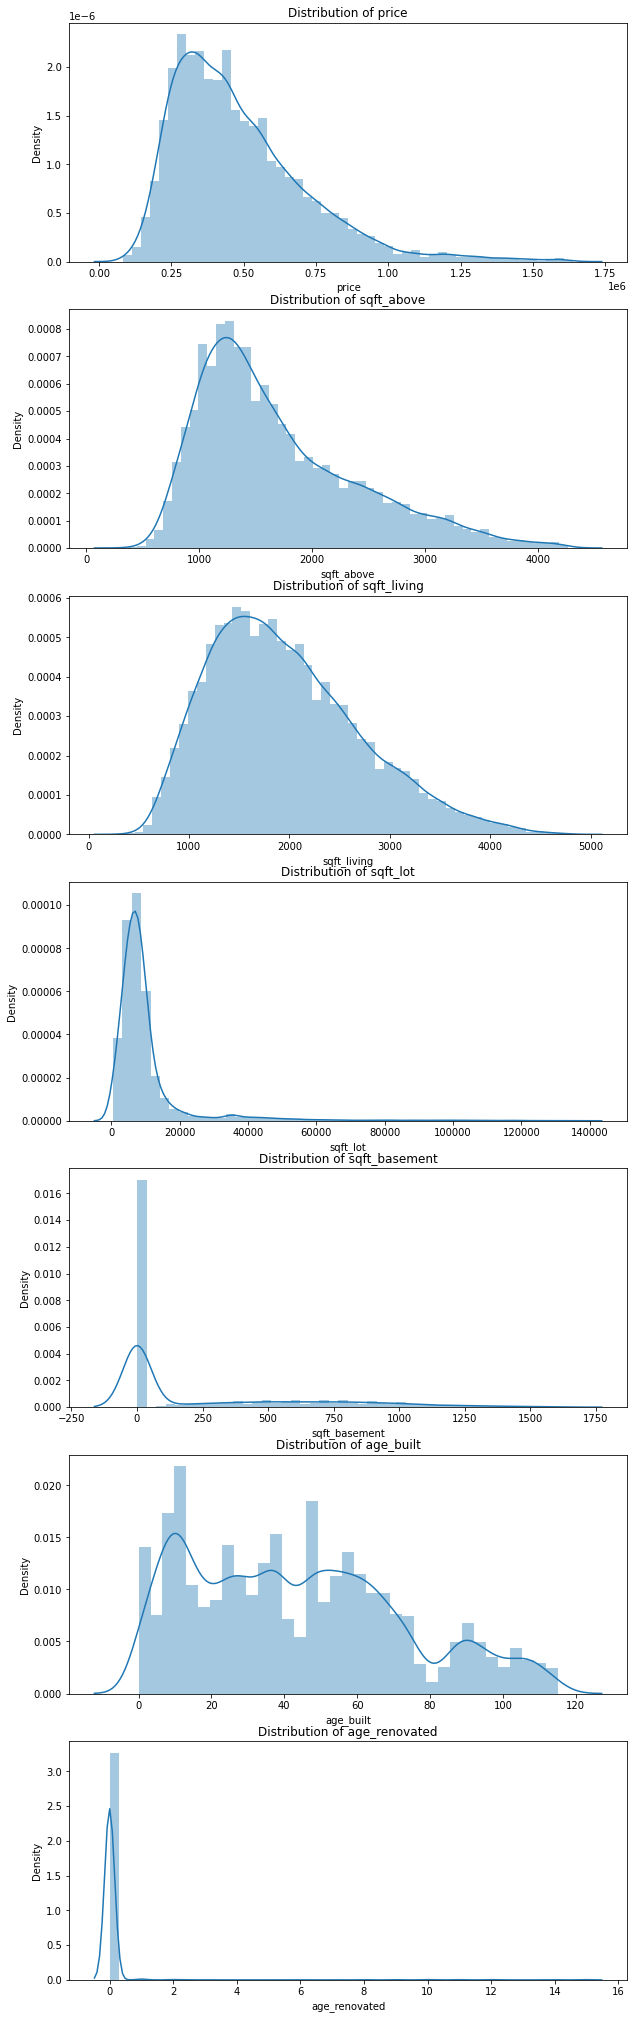

In [31]:
# Getting the distribution of continous variables.
my_cols=['price','sqft_above','sqft_living','sqft_lot','sqft_basement','age_built','age_renovated']
fig,ax=plt.subplots(len(my_cols),figsize=(10,36))
for i,cols in enumerate(my_cols):
  sns.distplot(Clean_df1[cols],ax=ax[i],kde=True)
  ax[i].set_title('Distribution of '+format(cols),fontsize=12)

It is evident from the above plots:

*  The price distribution is positively skewed meaning that the mean is greater than the mode and most houses are at a cheaper rate.
* The distribution of the Area in square feet above is also postitively skewed and towards the left side and the areas are on the lower side.

*  The distribution of area in square feet of the living rooms is slighly positively skewed. The same case is in the parking lot, while most houses do not have parking lots,the a large number ones with parking lots dont have a large ones.

* The distribution of areas of the basements is concentrated around zero meaning most houses dont have a basement area and those with basements are few.The distribution is leptokurtic around zero and light tailed slightly around 250 to 1250 Square meters.
* The ages of houses are multi modal with an light tailed and close to normal distribution.Most houses on the other hand have not been renovated.










#### Distcrete and Ordinal

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

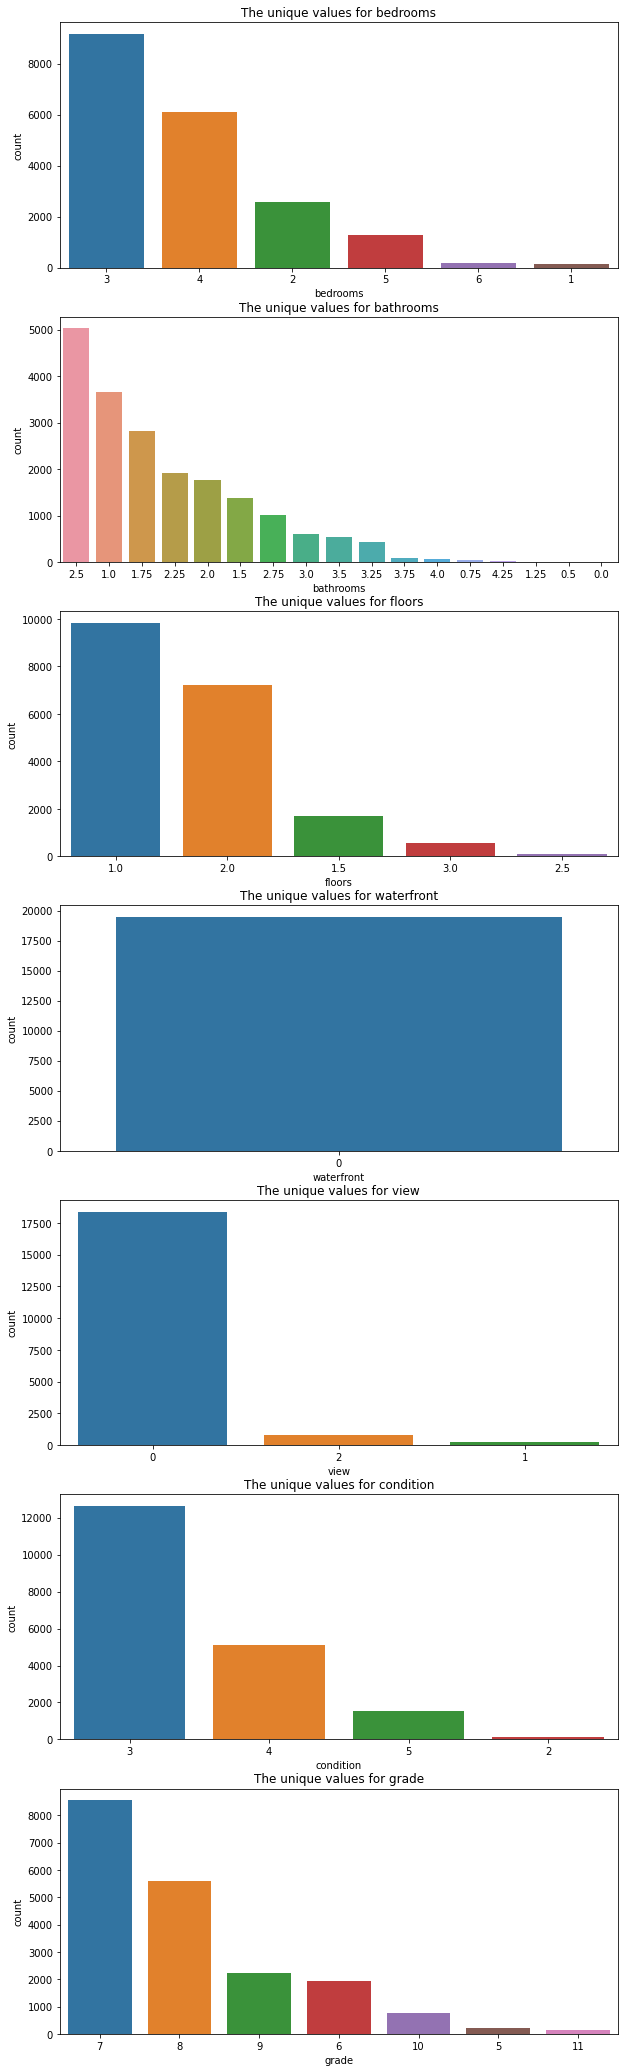

In [32]:
# Using 
ordinal=['bedrooms','bathrooms','floors','waterfront','view','condition','grade']
fig,ax=plt.subplots(len(ordinal),figsize=(10,37))
for i,cols in enumerate(ordinal):
  sns.countplot(Clean_df1[cols],order=Clean_df1[cols].value_counts().index,ax=ax[i]) 
  ax[i].set_title('The unique values for '+format(cols))

#### From the plotting of the coutplots above we see that

*  Most houses have three bedrooms followed closely by four bedrooms. The least number of bedrooms that houses in this survey have in one bedroom. Six bedrooms are not common as well as five bedrooms.
*  Most houses had two bathrooms. 
*  Most houses have one floor followed closely by two floored houses.
*  During outlier removal, the presence of waterfront was greately affected since only an infentisimal number of houses had water fronts.
*  Very few houses have views with most registering zero.

#### On to ordinal data:

*  Most houses were rated to have a condition of three which is an average rate
*  The grading of most houses was at an average of approximately 7. The least was 11 which is the best grade.






### b.) Bivariate Analysis

In [33]:
# Dropping waterfront since it only has 0 values
analsyis_df=Clean_df1.drop(columns=['waterfront'],axis=1)

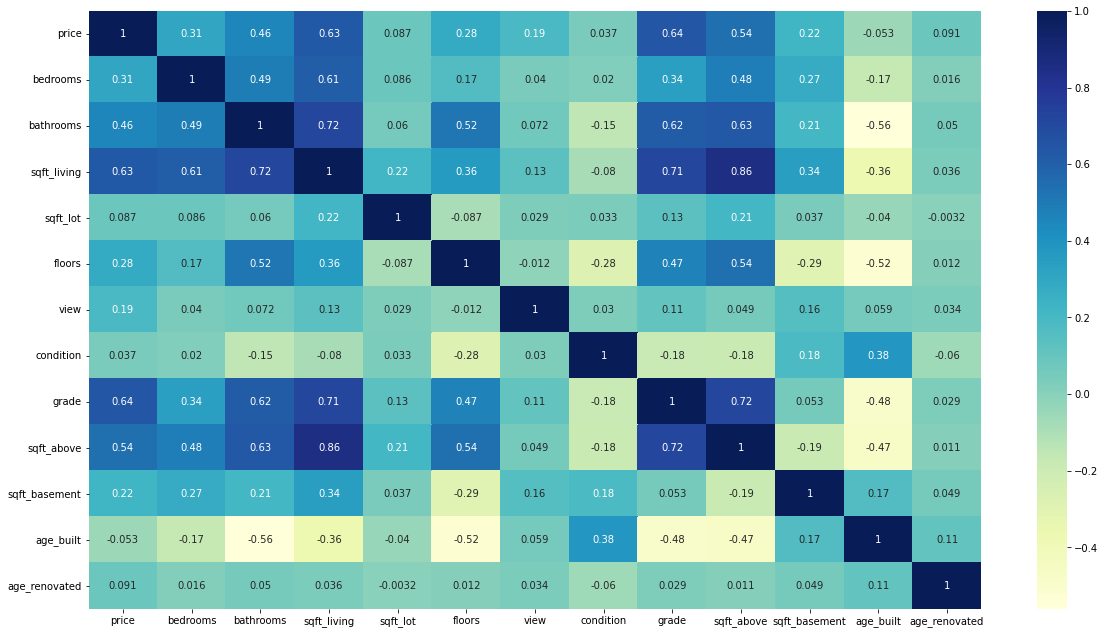

In [34]:
# Observing the relationship within the dataset.
Cor1=analsyis_df.corr()
plt.figure(figsize=(20,11))
sns.heatmap(Cor1, cmap="YlGnBu", annot=True)
plt.show()

There is a moderately positive correlation between Area of the living room with area above of 0.86.


In [35]:
def barplots(data,col1,col2):
  plt.figure(figsize=(10,6))
  sns.barplot(x=col1, y=col2,data=data, palette='Oranges_r')
  plt.title('The relationship between '+str(col1)+' and '+str(col2),fontsize=15)
  plt.show()

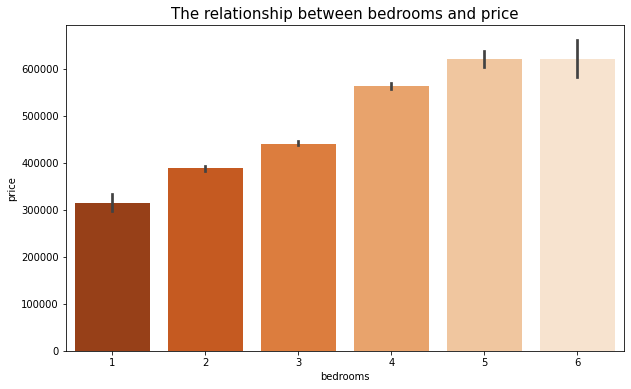

In [36]:
# Viewing the relationship between the bedroom amount and the prices
barplots(analsyis_df,'bedrooms','price')

Houses with more bedrooms have a higher price

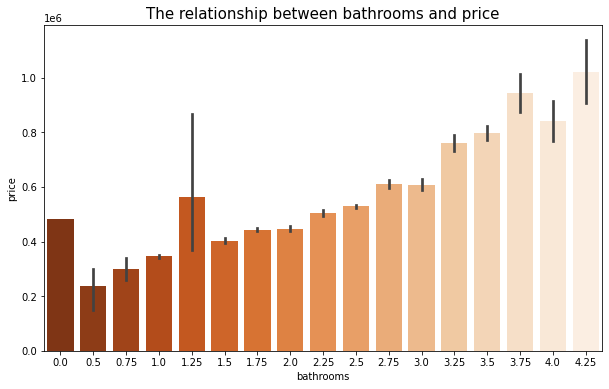

In [37]:
# Viewing the relationship between the bathrooms amount and the prices
barplots(analsyis_df,'bathrooms','price')

Higher number of bathrooms warranted a higher price. But some houses with a mean of 1 bathroom were pricey as compared to those with two bathrooms. This should be investigated.

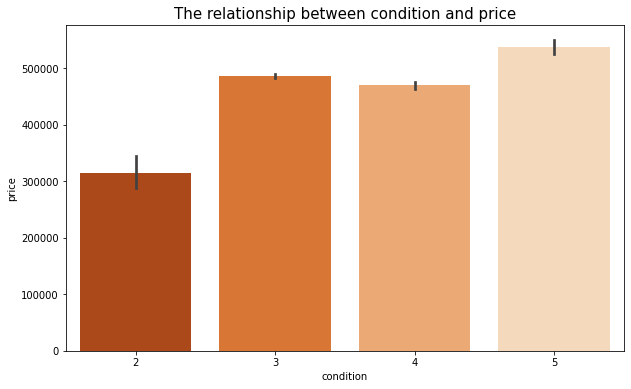

In [38]:
# Viewing the relationship between the housing conditions and the prices
barplots(analsyis_df,'condition','price')

Higher rating of housing conditions warranted a higher price

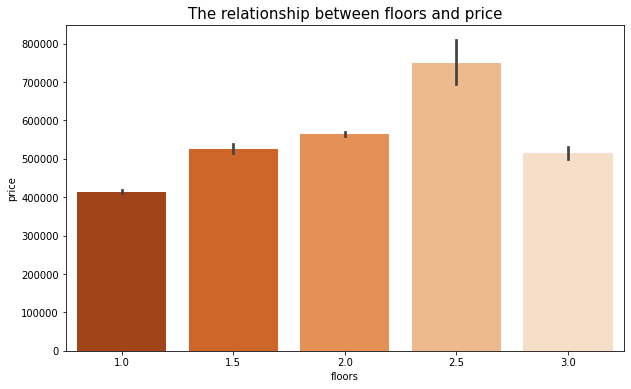

In [39]:
# Viewing the relationship between the number of floors and the prices
barplots(analsyis_df,'floors','price')

The houses with more floors are expensive, it is however important to note that three floor buildings are cheaper than the two floored buildings in this scope of data

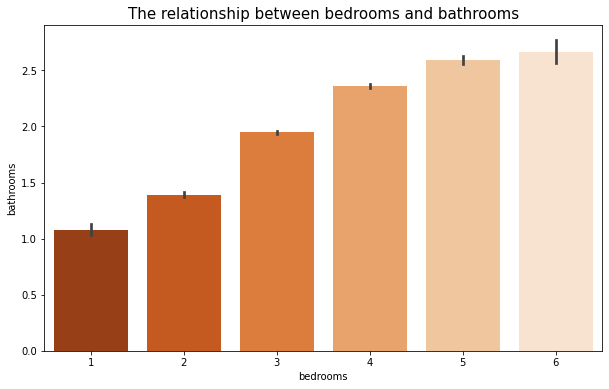

In [40]:
barplots(analsyis_df,'bedrooms','bathrooms')

Houses with more bedrooms have more bathrooms

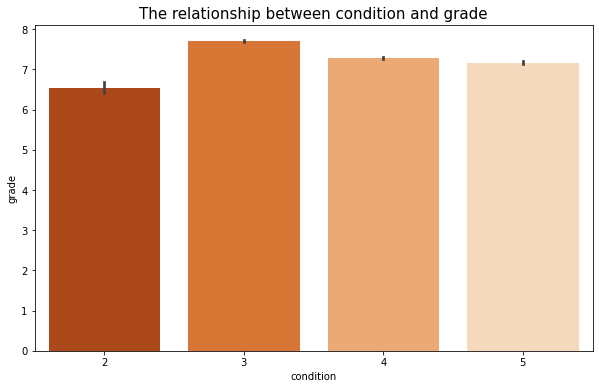

In [41]:
barplots(analsyis_df,'condition','grade')

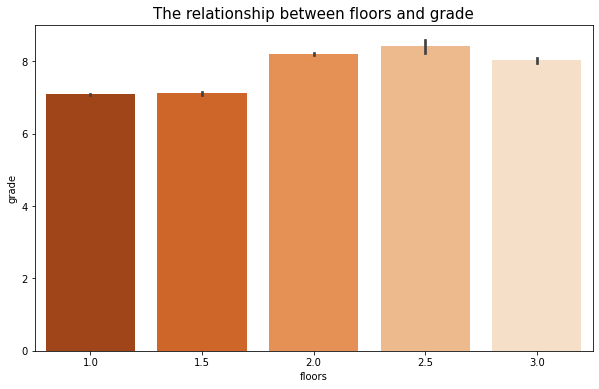

In [42]:
barplots(analsyis_df,'floors','grade')

Houses weith more floors are rated highly with a few exemptions

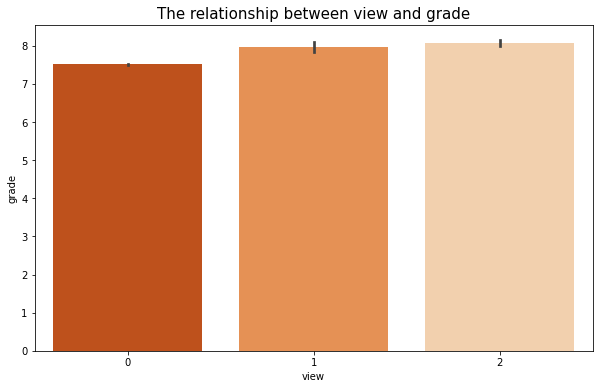

In [43]:
barplots(analsyis_df,'view','grade')

Houses with views have a higher grade

Numerical Numerical

In [44]:
# A funtion for exporing the relationship between continous variables and the house prices.
def scatterplots(data,col1,col2):
  plt.figure(figsize=(10,6))
  sns.scatterplot(x=col1, y=col2,data=data)
  plt.title('The relationship between '+str(col1)+' and '+str(col2),fontsize=15)
  plt.show()

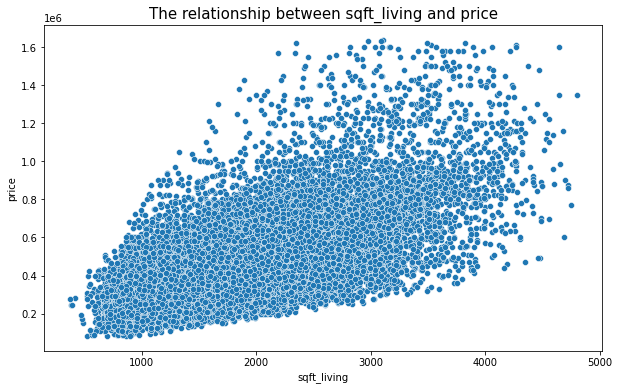

In [45]:
# relationship between the Area of the living room with he prices.
scatterplots(analsyis_df,'sqft_living','price')

It is safe to note that the relationship is linear. Meaningthat larger living room areas warranted higher prices.

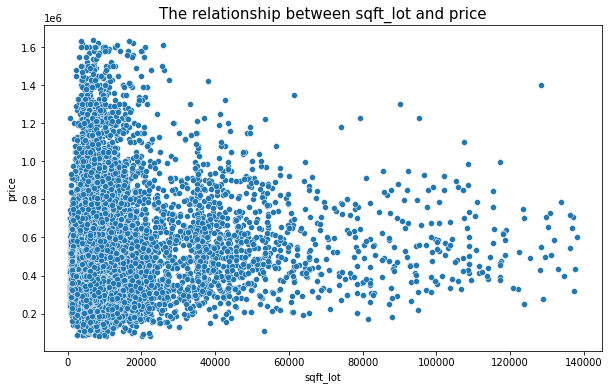

In [46]:
scatterplots(analsyis_df,'sqft_lot','price')

As could be seen in the Area of the parking lot relationship, Most houses dont have parking lots thus the data is concentrated along zero and the bare minimum . However the ones with parking lots dont show a significant change in the pricing.

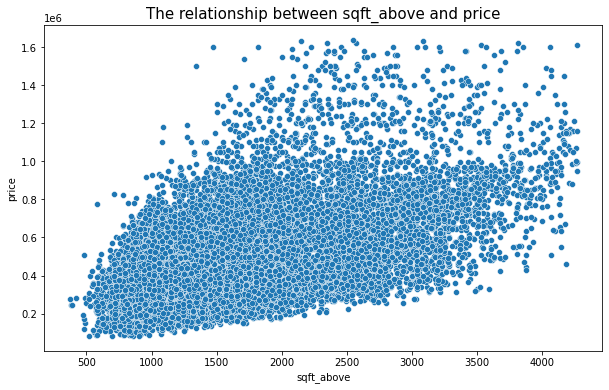

In [47]:
# Area above ie. sort of roof tops.
scatterplots(analsyis_df,'sqft_above','price')

The relationship is relatively linear. Houses with larger areas above are expensive as compared with those with small areas above.

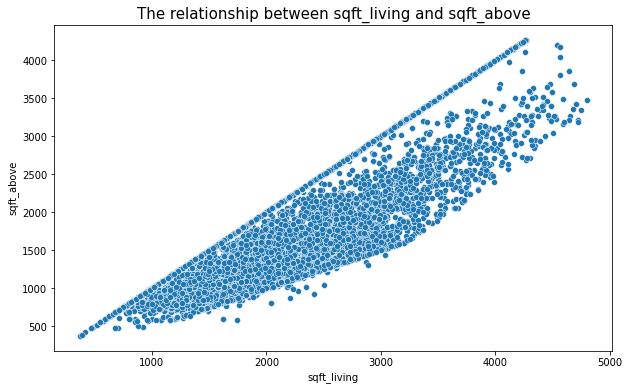

In [48]:
scatterplots(analsyis_df,'sqft_living','sqft_above')

The relationship is linear. Houses with more space in the living area have large spaces above.

#### Trend

In [49]:
# Function for plotting line plots
def lineplots(data,col1,col2):
  plt.figure(figsize=(10,6))
  sns.lineplot(x=col1, y=col2,data=data)
  plt.title('The relationship between '+str(col1)+' and '+str(col2),fontsize=15)
  plt.show()

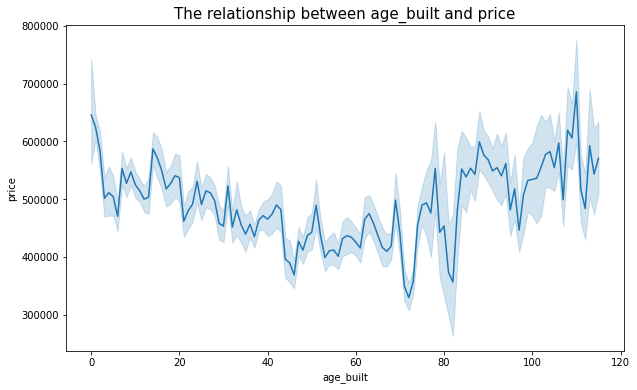

In [50]:
# The relationship between the age of the houses and the prices
lineplots(analsyis_df,'age_built','price')

As much as the trend is irregular, we can evidently see that new houses are relatively expensive. However there are old houses that are being sold at a relatively high rate. I could attribute it to various factors eg. People preference for antiques etc.

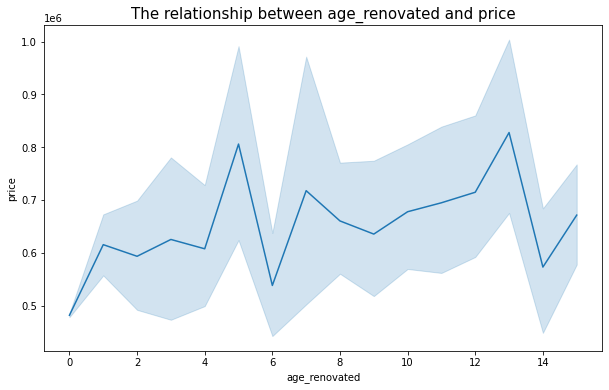

In [51]:
# Age since renovation 
lineplots(analsyis_df,'age_renovated','price')

An interesting phenomena is to be noted here. The houses with zero havent been renovated as i subtracted the current year of data collection and the year of renovation and those with zero years i renderd as zero meaning no renovation was done. They are at the lower size when it comes to price.
However the price trend goes up with the most recently renovated houses, then down as the years since renovation increase meaning the renovation was done a while back.(This is an intersting discovery)

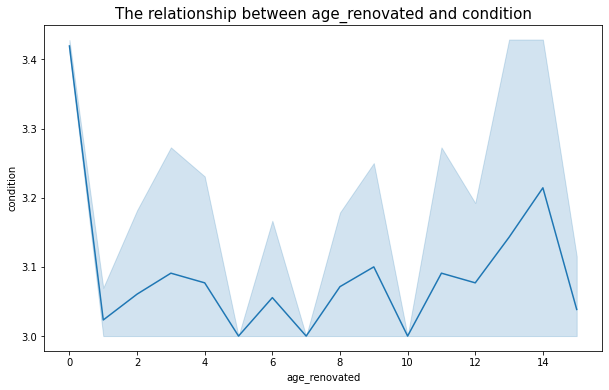

In [52]:
lineplots(analsyis_df,'age_renovated','condition')

### c.) Multivariate Analysis

In [53]:
def multipleplots(data,col1,col2,col3):
  plt.figure(figsize=(10,6))
  sns.barplot(x=col1, y=col2,data=data, hue=col3,palette='copper_r')
  plt.title('The relationship between '+str(col1)+' and '+str(col2),fontsize=15)
  plt.show()

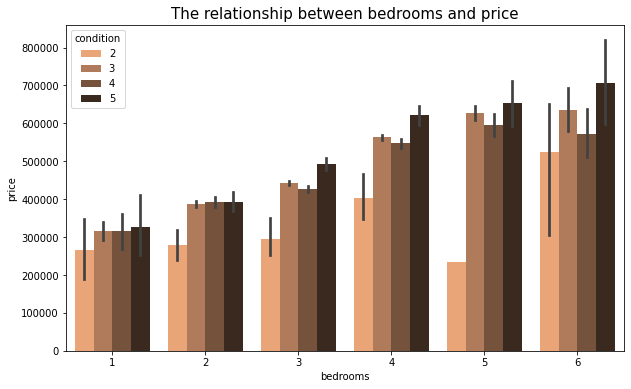

In [54]:
# analysing the relationship between old houses and number of bedrooms with the pricing
multipleplots(analsyis_df,'bedrooms','price','condition')

Houses with more bedrooms were expensive and the conditions are great.

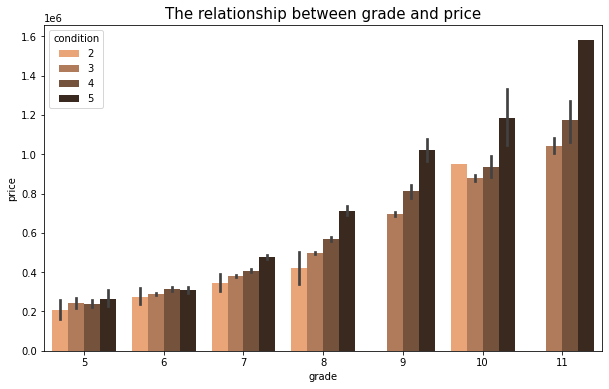

In [55]:
multipleplots(analsyis_df,'grade','price','condition')

Houses a higher grade were expensive and the conditions are great.

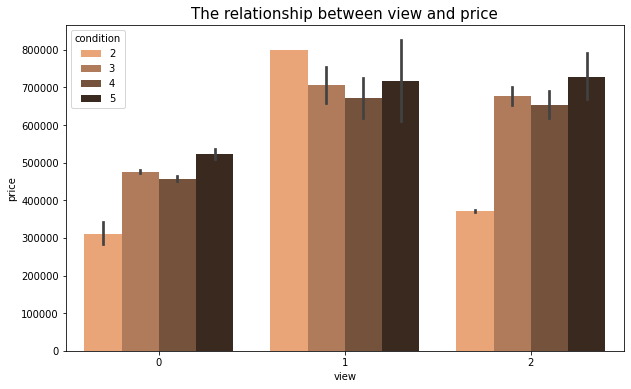

In [56]:
multipleplots(analsyis_df,'view','price','condition')

Here houses with one view are more expensive

In [57]:
def continousplots(data,col1,col2,col3):
  plt.figure(figsize=(10,6))
  sns.scatterplot(x=col1, y=col2,data=data,size=col3,hue=col3)
  plt.title('The relationship between '+str(col1)+' and '+str(col2),fontsize=15)
  plt.show()

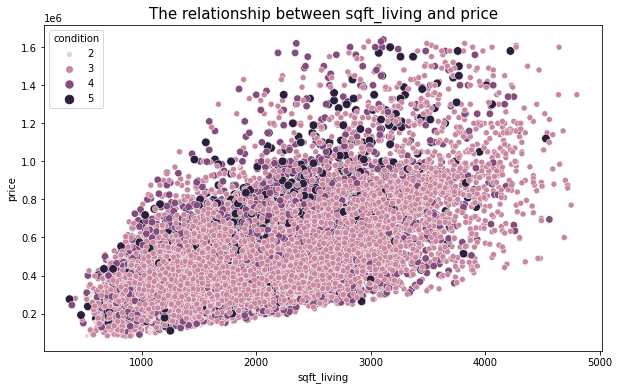

In [58]:
continousplots(analsyis_df,'sqft_living','price','condition')

Houses with good conditions are concentrated on the higher end as compared to the houses with a lower condition rating

In [59]:
#  Function for plotting line plots
def linemultiple(data,col1,col2,col3):
  plt.figure(figsize=(10,6))
  sns.lineplot(x=col1, y=col2,data=data,hue=col3)
  plt.title('The relationship between '+str(col1)+' and '+str(col2),fontsize=15)
  plt.show()

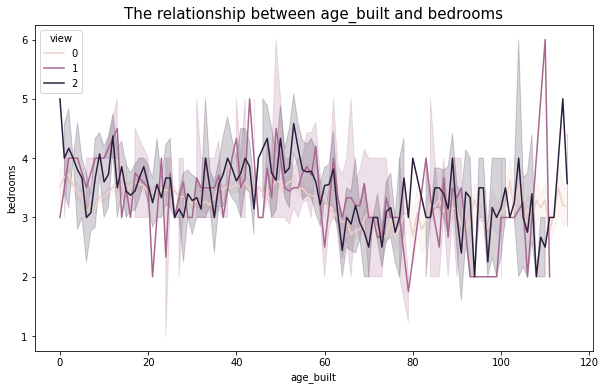

In [139]:
 linemultiple(analsyis_df,'age_built','bedrooms','view')

## 7.) Feature Engineering

In [166]:
analsyis_df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,age_built,age_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,60,0
1,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,82,0
2,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,50,0
3,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,28,0
4,257500.0,3,2.25,1715,6819,2.0,0,3,7,1715,0,20,0


In [162]:
# Preparing all the data needed for analysis.
X=analsyis_df.iloc[:,1:].values
X
# For checking corlinearity and any particular operation where column names are involved
X1=analsyis_df.iloc[:,1:]
X1
# #Dependent variable
Y=analsyis_df['price'].values
Y
# The Y dataframe for performing any particular operation where column names are involved
Y1=analsyis_df['price']
Y1
#Scaling of my features is needed to normalize the range of independent variables
sk=StandardScaler()
X_trans=sk.fit_transform(X)


## 8.) Implementing the Solution

#### a.) Modelling

####  Baseline Model:Linear model

In [163]:
# Checking for the variance inflation factor
for i in range(len(X1.columns)):
  df=pd.DataFrame({'Features':X1.columns,'VIF':vif(X1.values,i)})
df
# The independent variables are indeed independent and ready for modeling.


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,bedrooms,1.063896
1,bathrooms,1.063896
2,sqft_living,1.063896
3,sqft_lot,1.063896
4,floors,1.063896
5,view,1.063896
6,condition,1.063896
7,grade,1.063896
8,sqft_above,1.063896
9,sqft_basement,1.063896


In [164]:
# Splitting the data into training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X_trans,Y,test_size=0.2,random_state=0)
# Fitting the linear model
lin_regressor=LinearRegression()
lin_regressor.fit(X_train,Y_train)
# Making the prediction
Y_pred=lin_regressor.predict(X_test)
# Evaluating the model
print('My RMSE for the lInear Regression model is:',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))


My RMSE for the lInear Regression model is: 154164.80376312954


In [165]:
# Getting the coefficients of the independent variables to 
lin_coef={}
for coef,feat in zip(lin_regressor.coef_,X1.columns):
  lin_coef[feat]=coef 
lin_coef

{'age_built': 88624.16920560882,
 'age_renovated': 4057.4739629244245,
 'bathrooms': 23375.713204385887,
 'bedrooms': -16049.490354178939,
 'condition': 13531.580049272014,
 'floors': 23428.33185171755,
 'grade': 119184.20809256527,
 'sqft_above': 32129.304852771314,
 'sqft_basement': 24149.050152839838,
 'sqft_living': 43329.36093260808,
 'sqft_lot': -7673.312823288026,
 'view': 13985.823369953452}

The error is too big. A residual plot is better placed to let me know whether variance within the dataset caused this extent of error.

Mean residuals 2536.8347957798865
Max residuals 467455.427323285


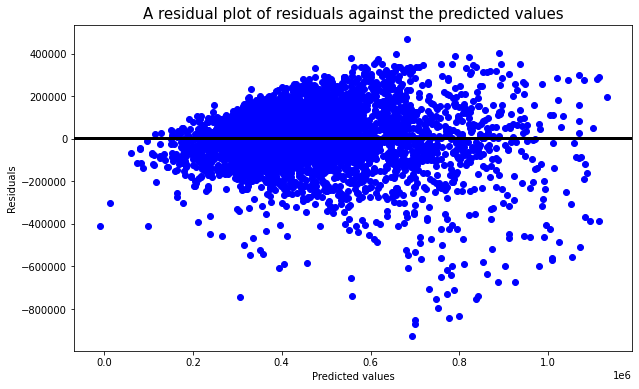

In [174]:
# Using redidual plots to see the extent of our errors
residuals=np.subtract(Y_pred,Y_test)
print('Mean residuals',residuals.mean())
print('Max residuals',residuals.max())
#Plotting this in a residual plot to see variation in our prediction
plt.figure(figsize=(10,6))
plt.scatter(Y_pred,residuals,color='blue')
plt.title('A residual plot of residuals against the predicted values',fontsize=15)
plt.ylabel('Residuals')
plt.xlabel('Predicted values')
plt.axhline(y=residuals.mean(),color='black',linewidth=3)
plt.show()
# Our most fitted values are scattered on the sections were the predicted values was greater than the ideal.
# My aim is to have a residual values as closer to minimal as possible meaning that there is no great difference between the predicted and the ideal.
# Our residual plot seems normal.

Seeing that no wierd patterns are seen in the residual plot we want to clearly see whether the error is due to variance.
Using a barletts test to test for heteroscedasticity.

### Hypothesis Testing

#### H0: Variance is equal across all datapoints. The variance is homogeneous.
#### H1: There is unequal variance at atleast one pair of datapoints.

In [175]:
# Testing for unequal variance.
import scipy as sp
test_results,p_value=sp.stats.bartlett(Y_pred,residuals)
print(test_results,p_value)
# Using the chi squared distribution to get the critical values and assess whether the test statistic is in the acceptance or the rejection zone of the distribution.
dof=len(Y_pred)-1
prob=1-p_value
# Computing the critical value
Critical_value=sp.stats.chi2.ppf(prob,dof)
# Asessing where the test statistic lies
if test_results>Critical_value:
  print('Reject the null hypothesis:there is unequal variance within the samples')
else:
  print('Fail to reject the null hypothesis:The variance is homogeneous')

77.28475544881314 1.4800400149190279e-18
Fail to reject the null hypothesis:The variance is homogeneous


This lets us know that there is no disparity existing in the predicted and the residuals that is of concern. The problem still remains that our data still exhibits a large error.

## 9.) Challenging the Solution

The causitive agent of the large error in prediction may not be the data as much. The model choice is limited thus i will challenge the solution by exploring different model optimization techniques to assess any changes in prediction error.

### a.) Quantile regression
#### This is aimed at assessing the predictions at the exact quantiles of the dependent variables to answer the question:
#### What are the factor affecting housing prices and how ?

Checking for variance in the dependent and independent variables 

In [176]:
# The first step is checking for heteroscedasticity within the dataset itself to asess constant and nonconstant variance
print(X.shape)
print(Y.shape)
# Making X one dimensional to check for variance within it
X_bar=X.reshape(-1)
print(X_bar.shape)
# 

(19446, 12)
(19446,)
(233352,)


#### H0:The variance is normal across the set(X and Y)
#### H1:The variance is unequal across the set(X and Y);There is heteroscedasticity within the dataset.

In [177]:
import scipy.stats as sp
test_result,pvalue=sp.bartlett(Y,X_bar)
print(test_result,pvalue)
# Plotting the critical value 
DOF=len(Y)-1
prob=1-pvalue
from scipy.stats import chi2 
CV=sp.chi2.ppf(prob,DOF)
# Conclusion
if test_result>CV:
  print('Reject the null hypothesis:The sample is homogenous')
else:
  print('Fail to reject the Ho: There is unequal variance')

1176749.8572677474 0.0
Fail to reject the Ho: There is unequal variance


#### Executing quantile regression to see the the coeficient of x and the distribution within the dependent variable

In [178]:
# finding the parameters at the median in the dependent variable
import statsmodels.formula.api as smf
X_quant=analsyis_df.drop(columns=['sqft_basement','price'],axis=1)
X_quant 
print(Y1.shape)
print(X_quant.shape)
# Quantile regression to see distribution at the median
quant_regressor=smf.quantreg('Y1 ~ X_quant',analsyis_df)
res=quant_regressor.fit(q=.5)
print(res.summary())
# The reason one column was dropped was because of the shaping to form a matrix to be executed by the quantile regressor seemed problematic.

(19446,)
(19446, 11)
                         QuantReg Regression Results                          
Dep. Variable:                     Y1   Pseudo R-squared:               0.3600
Model:                       QuantReg   Bandwidth:                   2.357e+04
Method:                 Least Squares   Sparsity:                    3.197e+05
Date:                Sat, 16 Oct 2021   No. Observations:                19446
Time:                        14:19:32   Df Residuals:                    19434
                                        Df Model:                           11
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.085e+05   1.42e+04    -56.837      0.000   -8.36e+05   -7.81e+05
X_quant[0]  -2.201e+04   1763.046    -12.486      0.000   -2.55e+04   -1.86e+04
X_quant[1]    2.89e+04   2910.984      9.928      0.000    2.32e+04    3.46e+04
X_quant[2]    128.6576    

In [181]:
X_quant.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'age_built', 'age_renovated'],
      dtype='object')

In [172]:
# Providing a list of quantiles to observe
quantile=[0.25,0.5,0.75]
# Creating a list to append my models
models=[]
# Creating a list to store parameters in the quant regressor 
params=[]
 # # Looping through the quantile
columns=['X_quant[0]','X_quant[1]','X_quant[2]','X_quant[3]','X_quant[4]','X_quant[5]','X_quant[6]','X_quant[7]','X_quant[8]','X_quant[9]','X_quant[10]']
for i in quantile:
  for j in columns:
    res=quant_regressor.fit(i)
    models.append(res)
    params.append([i,res.params['Intercept'],res.params[j]]+res.conf_int().loc[j].tolist())
df=pd.DataFrame(data=params,columns=['Qt','Intercept','Coef_x','Lower_bound','Upper_bound'])
df

,Qt,Intercept,Coef_x,Lower_bound,Upper_bound
0,0.25,-735065.240376,-21848.226233,-25388.956873,-18307.495592
1,0.25,-735065.240376,28721.561419,22953.758637,34489.364200
2,0.25,-735065.240376,99.350616,90.915136,107.786096
3,0.25,-735065.240376,-0.320396,-0.492371,-0.148421
4,0.25,-735065.240376,52916.095999,47039.895982,58792.296015
5,0.25,-735065.240376,26029.903534,20181.284359,31878.522709
6,0.25,-735065.240376,13354.064804,9398.211690,17309.917918
7,0.25,-735065.240376,98087.446514,94705.799385,101469.093643
8,0.25,-735065.240376,-22.537884,-30.086784,-14.988983
9,0.25,-735065.240376,2548.379559,2440.608871,2656.150248


### Distribution, y intercept and coeficients at different quantiles.

<Figure size 432x288 with 0 Axes>

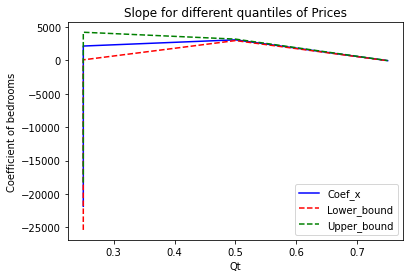

In [189]:
bedrooms=df.loc[0:32:10]# This gets the influence of a single variable at each quantile of the target variable
bedrooms
plt.figure(6)
bedrooms.plot(x ='Qt', y = ['Coef_x','Lower_bound','Upper_bound'], 
	title = 'Slope for different quantiles of Prices', kind ='line', style = ['b-','r--','g--'])
plt.ylabel('Coefficient of bedrooms')
plt.show()
# Most values were close to zero ,thus the shape of the graph.

<Figure size 432x288 with 0 Axes>

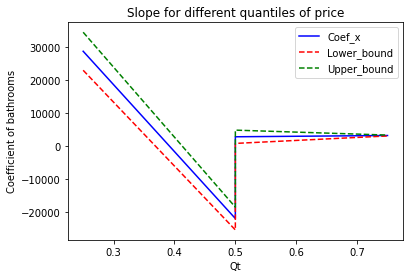

In [191]:
bathrooms=df.loc[1:32:10]
bathrooms
plt.figure(6)
bathrooms.plot(x ='Qt', y = ['Coef_x','Lower_bound','Upper_bound'], 
	title = 'Slope for different quantiles of price', kind ='line', style = ['b-','r--','g--'])
plt.ylabel('Coefficient of bathrooms')
plt.show()
# At the median of y the x is not a strong influencer. 
# At cheaper rates of houses the number of bathrooms is a strong factor to use when predicting the price

<Figure size 432x288 with 0 Axes>

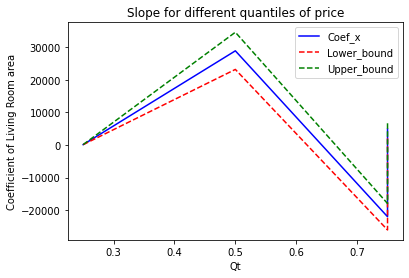

In [193]:
sqft_living=df.loc[2:32:10]
sqft_living
plt.figure(6)
sqft_living.plot(x ='Qt', y = ['Coef_x','Lower_bound','Upper_bound'], 
	title = 'Slope for different quantiles of price', kind ='line', style = ['b-','r--','g--'])
plt.ylabel('Coefficient of Living Room area')
plt.show()
# At the median of Prices the living room area is a strong influencer. 
# At expnsive rates of house prices the living room area is has a negative coeficient to mean that for every unit increase in living room area the prices for the expensive houses fall. 

<Figure size 432x288 with 0 Axes>

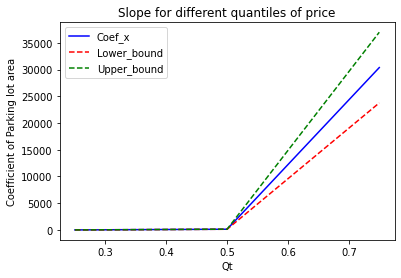

In [194]:
# The coeficient of Parking lot size accross all quantiles of prices
sqft_lot=df.loc[3:32:10]
sqft_lot
plt.figure(6)
sqft_lot.plot(x ='Qt', y = ['Coef_x','Lower_bound','Upper_bound'], 
	title = 'Slope for different quantiles of price', kind ='line', style = ['b-','r--','g--'])
plt.ylabel('Coefficient of Parking lot area')
plt.show()
# The coefficient of parking lots increases in expensive houses.(at the 50th percentile)

<Figure size 432x288 with 0 Axes>

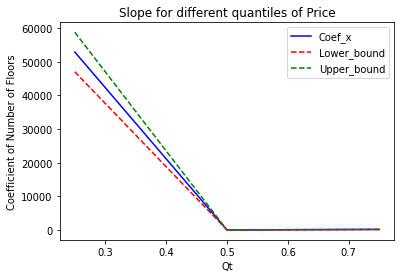

In [196]:
# The coeficient of number of floors accross all quantiles of prices
floors=df.loc[4:32:10]
floors
plt.figure(6)
floors.plot(x ='Qt', y = ['Coef_x','Lower_bound','Upper_bound'], 
	title = 'Slope for different quantiles of Price', kind ='line', style = ['b-','r--','g--'])
plt.ylabel('Coefficient of Number of Floors')
plt.show()
# Cheaper houses have their prices influenced strongly by number of floors unlike expensive(at the 50th percentile and above)

<Figure size 432x288 with 0 Axes>

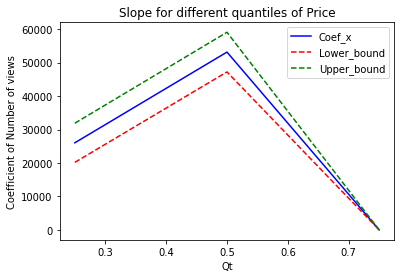

In [198]:
# The coeficient of Parking lot size accross all quantiles of prices
view=df.loc[5:32:10]
view
plt.figure(6)
view.plot(x ='Qt', y = ['Coef_x','Lower_bound','Upper_bound'], 
	title = 'Slope for different quantiles of Price', kind ='line', style = ['b-','r--','g--'])
plt.ylabel('Coefficient of Number of views')
plt.show()
# At the 50th percentile, house prices are greately influenced by the number of views unlike beyong the 75th percentile.

<Figure size 432x288 with 0 Axes>

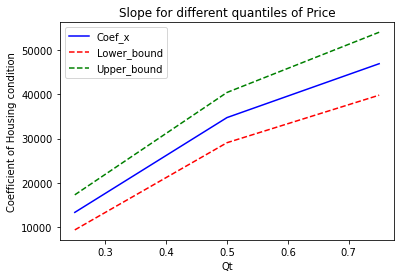

In [199]:
# 'grade', 'sqft_above', 'age_built', 'age_renovated'],
condition=df.loc[6:32:10]
condition
plt.figure(6)
condition.plot(x ='Qt', y = ['Coef_x','Lower_bound','Upper_bound'], 
	title = 'Slope for different quantiles of Price', kind ='line', style = ['b-','r--','g--'])
plt.ylabel('Coefficient of Housing condition')
plt.show()
# The coeficient of condition increases across the quantiles. 
# Its the one variable with a constant (non varying) coeficient as thus a veru good candidate for making accurate predictions


<Figure size 432x288 with 0 Axes>

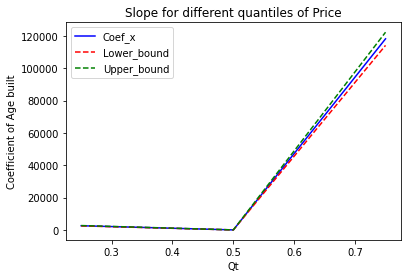

In [200]:
age_built=df.loc[9:32:10]
age_built
plt.figure(6)
age_built.plot(x ='Qt', y = ['Coef_x','Lower_bound','Upper_bound'], 
	title = 'Slope for different quantiles of Price', kind ='line', style = ['b-','r--','g--'])
plt.ylabel('Coefficient of Age built')
plt.show()
# from the 50th percentile onwards, the age of house is a strong predictor for price.

## Regularization

Im applying regularization to reduce variance while intoducing some form of bias in my dataset to avoid anycase of overfitting. From the assessment of variance above the model used before as a baseline is sensitive to any changes in the predictor variable thus regularization seeks to make it less senstitive to changes in the predictor variable thus make predictions that are robust and correct. We are trading off bias and variance and letting the model generalize more.

#### a.) Ridge Regression

In [86]:
# Using ridge regression to carry out regularization.
# Placing normalization to false because the X used in training was already normalized
ridge_reg=Ridge(normalize=True)
# Hyperparameter tuning to obtain the alpha to intoduce regression penalty factor to our loss function which this model seeks to minimize when added to the Ordinary least squares.
ridge_search=GridSearchCV(estimator=ridge_reg,param_grid={'alpha':np.logspace(0.1,3,10)},
                          scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
# Using the fit our data to obtain our alpha and best score
ridge_search.fit(X_train,Y_train)
# Obtaining by best parameter and the mean scorring and my best error score
print(ridge_search.best_params_)
# Obtain an estimate of error 
abs(ridge_search.best_score_)


{'alpha': 1.2589254117941673}


29751744997.5178

In [100]:
# The error stated above doesnt look good. predicting our Y variable to asses any change
ridge_reg1=Ridge(normalize=True,alpha=1.2589254117941673)
# Fitting the model
ridge_reg1=ridge_reg1.fit(X_train,Y_train)
# Predicting using ridge regression
Y_pred_ridge=ridge_reg1.predict(X_test)
# Evaluating our model
print('My RMSE for the Ridge Regression model is:',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_ridge)))

My RMSE for the Ridge Regression model is: 174118.7852768313


In [90]:
# Plotting the coefficients to see whether there was a significant shrinkage.
# Getting the coefficients of the independent variables to 
lin_coef_reg={}
for coef,feat in zip(ridge_reg1.coef_,X1.columns):
  lin_coef_reg[feat]=coef 
lin_coef_reg

{'age_built': 18973.76501214491,
 'age_renovated': 6580.322900271238,
 'bathrooms': 17985.346789691426,
 'condition': 9382.555543597136,
 'floors': 11788.046101627286,
 'grade': 43682.57524440165,
 'sqft_above': 26611.689117476788,
 'sqft_basement': 15775.903520976291,
 'sqft_living': 33741.380260253434,
 'sqft_lot': 405.0900123987982,
 'view': 12584.887892230881}

The model performed poorly when compared to the Ordinary Least Sqaures model. This could be attributed to equal shrinkage of the coeficients thus it did not prioretize the important predictors and those that arent important expacialy considering that there is a big disparity between the different coefficients as seen above.

#### b.) Lasso Regression

In [173]:
Lasso_reg=Lasso(normalize=True)
# Using lasso regressor as our estimator and and aiming at a strong r2 score. 
# A grid search to obtain the alpha value and the expected r2 score from the search is performed.
lasso_search=GridSearchCV(estimator=Lasso_reg,param_grid={'alpha':np.arange(0.1,3,0.1)},scoring='r2',cv=5,refit=True)
# Obtaining our alpha and the R2 score from the tuning above
lasso_search.fit(X_train,Y_train)
# Obtaining by best parameter and the mean scorring and my best error score
lasso_search.best_params_


{'alpha': 0.30000000000000004}

In [111]:
# Performing lasso regression with the alpha as 0.30000000000000004
Lasso_reg1=Lasso(normalize=True,alpha=0.30000000000000004)
# Fitting my models
Lasso_reg1.fit(X_train,Y_train)
# Making my prediction using lasso regressor
Y_pred_Lasso=Lasso_reg1.predict(X_test)
# Evaluating our model
print('My RMSE for the Lasso Regression model is:',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_Lasso)))
print('My R2 score for the Lasso Regression model is:',lasso_search.score(X_test,Y_test))
# Asessing the relationship between the Xtest and the predicted value.
print('The relationship between X_test and Y predict is :',metrics.r2_score(Y_test,Y_pred_Lasso))

My RMSE for the Lasso Regression model is: 155066.62834963584
My R2 score for the Lasso Regression model is: 0.5700226607360348
The relationship between X_test and Y predict is : 0.5700226607360348


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9083966108318.406, tolerance: 85888142067.292
  positive)


This is a significant improvement from 155071.64 which is the error in the Ordinary least sqaured. We could take a look at the coefficients and see which ones were shrinked significantly and by what extent.

In [103]:
# Coeficients with influence to the dependent variables. 
lin_coef_lasso={}
for coef,feat in zip(Lasso_reg1.coef_,X1.columns):
  lin_coef_lasso[feat]=coef 
lin_coef_lasso

{'age_built': 87586.6394758383,
 'age_renovated': 4318.425054123599,
 'bathrooms': 19462.047001163595,
 'condition': 12883.294068865973,
 'floors': 24449.27278720985,
 'grade': 122131.44376245227,
 'sqft_above': -8236.179845514362,
 'sqft_basement': 2251.665339390387,
 'sqft_living': 75503.59544848377,
 'sqft_lot': -6867.236293426456,
 'view': 14652.770544560306}

### Elastic Net Regression. 
#### This will combine the power of Lasso regression with the ridge regression to minimize the loss function. It will introduce some bias in my data and reduce variance significantly

In [119]:
elastic_reg=ElasticNet(normalize=True)
# Performing hyperparameter tuning to obtain alpha and the best mean square score
elastic_search=GridSearchCV(estimator=elastic_reg,
                            param_grid={'alpha':np.logspace(-3,5,10),'l1_ratio':[.2,.4,.6,.8]},
                            scoring='neg_mean_squared_error',
                            n_jobs=1,refit=True,cv=10)
# Fitting my model to get the best parameter and the best scoring
elastic_search.fit(X_train,Y_train)
# Best parameters
print(elastic_search.best_params_)


{'alpha': 0.001, 'l1_ratio': 0.8}


In [120]:
# Performing lasso regression with the alpha as 0.30000000000000004
elastic_reg1=ElasticNet(normalize=True,alpha= 0.001, l1_ratio= 0.8)
# Fitting my models
elastic_reg1.fit(X_train,Y_train)
# Making my prediction using lasso regressor
Y_pred_elastic=elastic_reg1.predict(X_test)
# Evaluating our model
print('My RMSE for the Lasso Regression model is:',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_elastic)))


My RMSE for the Lasso Regression model is: 190093.215950286


This model did not perform well either as the RMSE in prediction was greater than all the models used.

## Model assessment

This is a comprehensive assesment of the shrinking power of the regression models used.

In [134]:
# All models used to predict
lin_regressor = LinearRegression()
Lasso_reg1=Lasso(normalize=True,alpha=0.30000000000000004)
ridge_reg1=Ridge(normalize=True,alpha=1.2589254117941673)
elastic_reg1=ElasticNet(normalize=True,alpha= 0.001, l1_ratio= 0.8)
models = [(lin_regressor, 'Linear Regression'),
           (Lasso_reg1, 'Lasso'),
           (ridge_reg1, "Ridge Regression"),
           (elastic_reg1, "Elastic Net")]

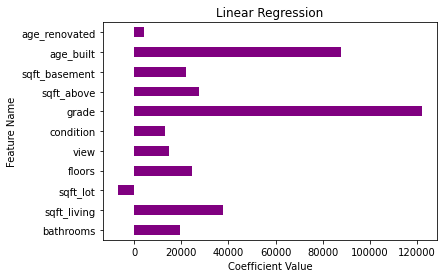

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9083966108318.406, tolerance: 85888142067.292
  positive)


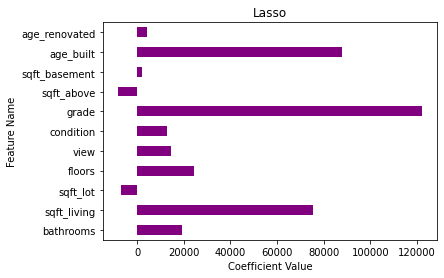

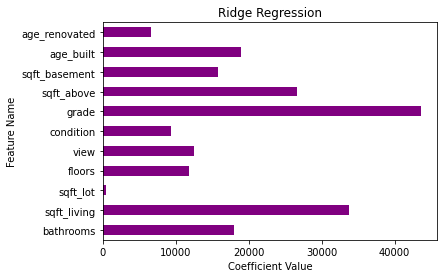

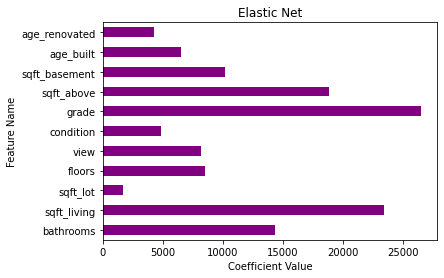

In [135]:
# Assessing th shrinking power of the models
for model in models:
    model[0].fit(X_train, Y_train)
    pd.Series(model[0].coef_, 
              index=X1.columns).plot(kind='barh',color='purple')
    plt.title(model[1])
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature Name')
    plt.show()

Lasso regressor shrinks models significantly with some acquiring a negative correlation .Ridge reduced the coeficient relatively. Linear regression uses the ideal independent variable coeficients.

In [136]:
# Checking the RMSE error in each model:
for model in models:
    rmse = np.sqrt(metrics.mean_squared_error(Y_test,model[0].predict(X_test)))
    print(f"The Root Mean Squared Error of {model[1]}: {rmse:.2f}")

The Root Mean Squared Error of Linear Regression: 155071.65
The Root Mean Squared Error of Lasso: 155066.63
The Root Mean Squared Error of Ridge Regression: 174118.79
The Root Mean Squared Error of Elastic Net: 190093.22


It is safe to note that the Lasso Regression so far has the least error as compared to other models used. This can be attributed to its power to shrink and select the variables that are more significant for prediction

## 9. Follow up questions

### a.) Did we have the right data?

Yes, the data we had was apropriate for analysis with most variables having a strong relationship to the house prices.
 * Age of houses and the grading of the houses.
 * Data about the history of sales could be provided to enable further analysis.

### b.) Do we need other data to answer our question?

The data used here is enough to carry out the desired research objective.  

### c.) Did we have the right question?

Yes, we could however carry out our analysis on the number of houses that would be sold in a specific period of time.

### d.) What needs to be re-evalutated?

Data collection proceedures need to be re-evaluated to understand the meaning of some factors eg:	
*   sqft_living15
*   sqft_lot15

They could be of use in the analysis. Houses sold in the past data could also be provided.


